## Paso 1:Importando librerías

In [5]:
from keras.datasets import mnist
from keras import layers, models
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

## paso 2:Buscar o crear nuestro set de datos

In [6]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [7]:
train_data.shape

(60000, 28, 28)

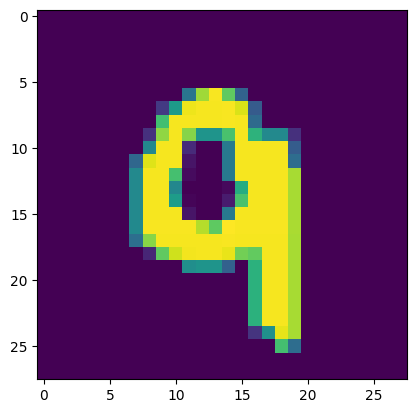

In [8]:
plt.imshow(train_data[30500])

<function matplotlib.pyplot.show(close=None, block=None)>

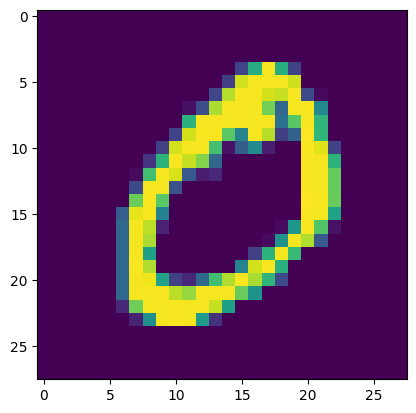

In [9]:
plt.imshow(train_data[1])
plt.show

In [ ]:
train_labels[30500]

## Paso 3: Limpieza o preporocesamiento de datos

In [ ]:
x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [ ]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## Paso 4: Creando un modelo de datos

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_labels[5]

In [ ]:
y_train[5]

## Paso 5: Entrenando el modelo

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

## Paso 6: Evaluando sobre data de test

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
import joblib
joblib.dump(model, 'calculadora.pkl')